In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('csv/b7/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


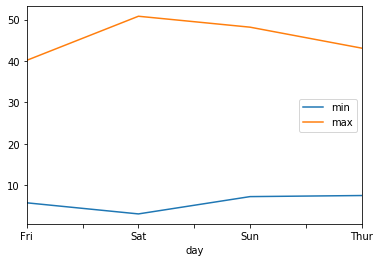

In [16]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()

In [5]:
# 7.1.1
len(df)

244

In [6]:
# 7.1.2
max(df['total_bill'])

50.81

In [8]:
# Для быстрого и корректного отображения графиков, которые мы будем строить, запустите  команду. 
# Она позволит автоматически выводить на экран все графики и диаграммы без использования дополнительных функций.
%matplotlib inline

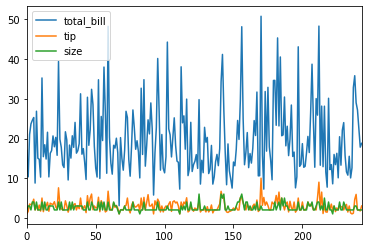

In [10]:
df.plot()

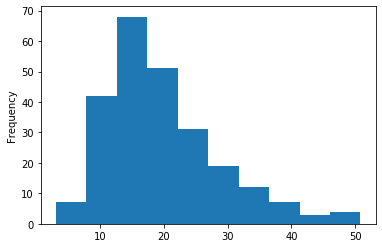

In [11]:
# Если применить метод plot не ко всему датафрейму, а только к одному столбцу, 
# а в качестве одного из параметров указать тип диаграммы (например, тип hist), 
# то мы получим гистограмму распределения признака: 
df['total_bill'].plot(kind = 'hist')

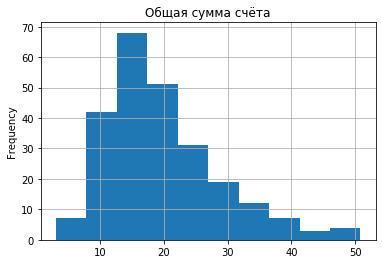

In [12]:
# Добавление параметров grid и title дополнит отображаемую диаграмму несколькими деталями:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

In [ ]:
# Для работы с категориальными (нечисловыми) переменными с помощью метода plot датафрейм необходимо 
# предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, 
# нужно посчитать, сколько заказов пришлось на каждый из дней. 
# Сделать это можно с помощью метода value_counts(), а уже к получившемуся датафрейму применить метод plot. 
# Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). 
# Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

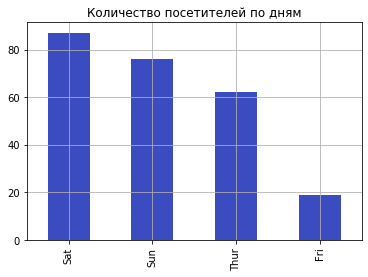

In [13]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

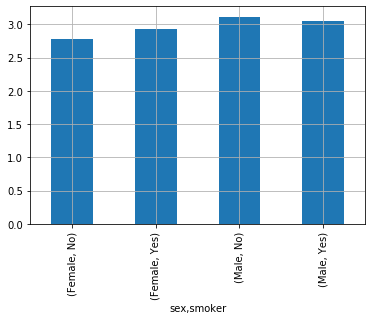

In [15]:
# 7.2.1
# С помощью какого кода можно получить такой график?
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

In [ ]:
# 7.2.2
# title, grid, colormap

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1184cff10>,
      dtype=object)

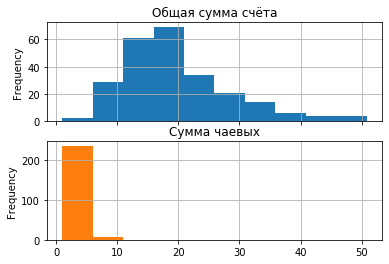

In [17]:
# Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. 
# При установке значения True можно разместить несколько графиков в одной рабочей области:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

In [ ]:
# Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, 
# но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. 
# Для получения такой информации мы можем построить график типа scatter plot:

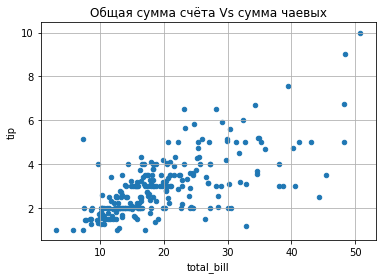

In [18]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

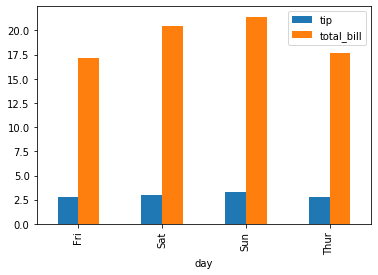

In [19]:
# Если нам нужно совместить на графике несколько качественных и количественных показателей, 
# то датафрейм следует предварительно обработать. 
# Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, 
# то потребуется такой код:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

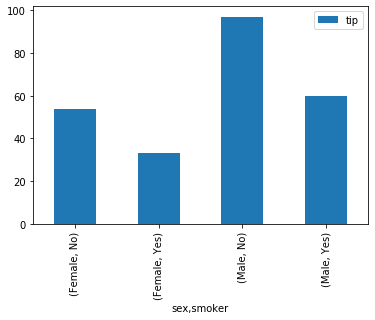

In [20]:
# 7.3.1
# Какой заголовок лучше подойдёт для диаграммы, созданной с помощью этого кода?
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

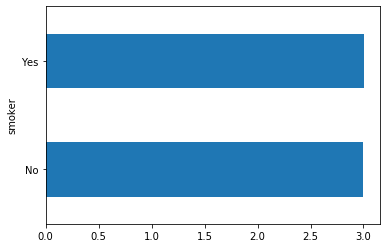

In [29]:
# 7.3.2
# Какой вариант кода лучше всего подходит для построения графика, отображающего среднюю сумму чаевых, 
# которые оставляют курящие и некурящие посетители?
df.groupby('smoker')['tip'].mean().plot(kind = 'barh') 

(array([ 1.,  1.,  5.,  5., 20., 17., 24., 18., 26., 23., 15., 13., 11.,
        13.,  7.,  7.,  7.,  5.,  5.,  5.,  2.,  2.,  2.,  3.,  0.,  2.,
         1.,  0.,  3.,  1.]),
 array([ 3.07      ,  4.66133333,  6.25266667,  7.844     ,  9.43533333,
        11.02666667, 12.618     , 14.20933333, 15.80066667, 17.392     ,
        18.98333333, 20.57466667, 22.166     , 23.75733333, 25.34866667,
        26.94      , 28.53133333, 30.12266667, 31.714     , 33.30533333,
        34.89666667, 36.488     , 38.07933333, 39.67066667, 41.262     ,
        42.85333333, 44.44466667, 46.036     , 47.62733333, 49.21866667,
        50.81      ]),
 <a list of 30 Patch objects>)

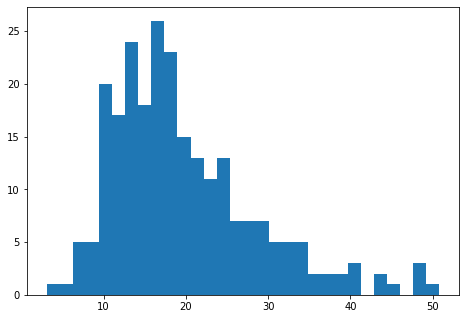

In [51]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins=30)

Text(0.5, 0, 'Сумма заказа, USD')

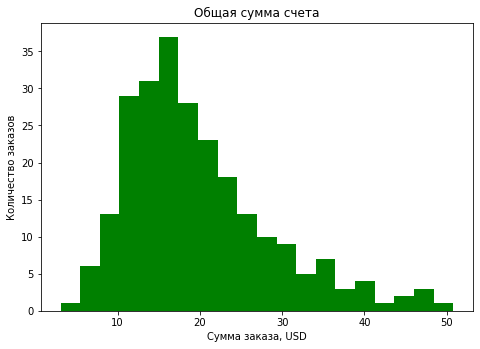

In [32]:
#7.4

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

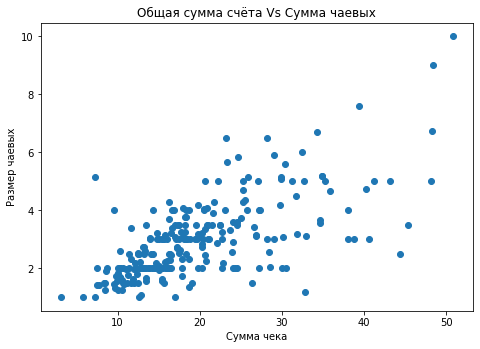

In [44]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

In [19]:
# 7.5
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

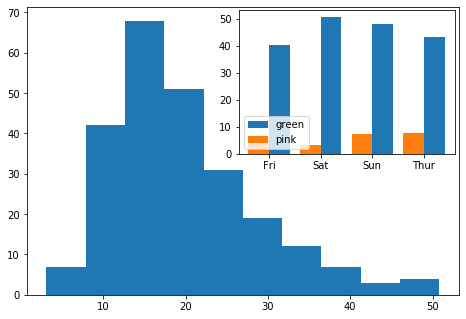

In [31]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])

insert_axes = fig.add_axes([0.49, 0.49, 0.5, 0.5])

# Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или 
# необходимо сместить их к краю. С помощью параметра width мы задаём ширину столбца в долях единицы 
# относительно ширины всего пространства, выделенного для данного столбца. 
# Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону:

#insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
#insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

#insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge', label='green')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge', label='pink')
insert_axes.legend(loc = 3)

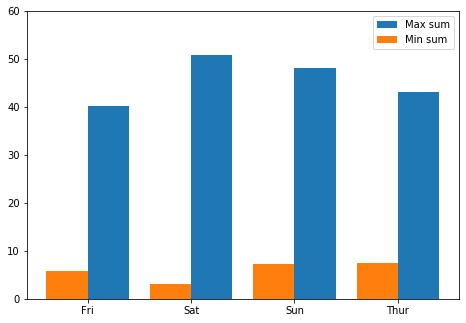

In [6]:
# 7.6
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60) # we should set up to avoid overlapping
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge', label='Max sum')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge', label='Min sum')
axes.legend(loc = 1)

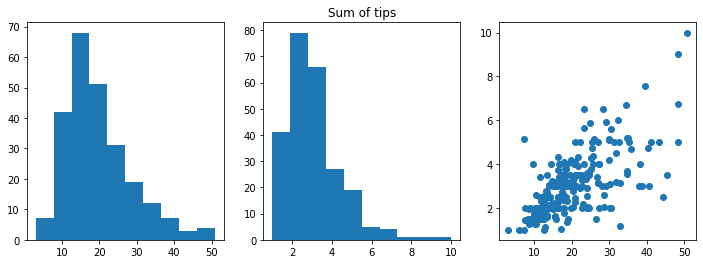

In [13]:
# 7.7
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[1].hist(df['tip'])
axes[1].set_title('Sum of tips')
axes[2].scatter(x = df['total_bill'], y = df['tip'], marker='o' )

In [35]:
# 7.8
# Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. 
# Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

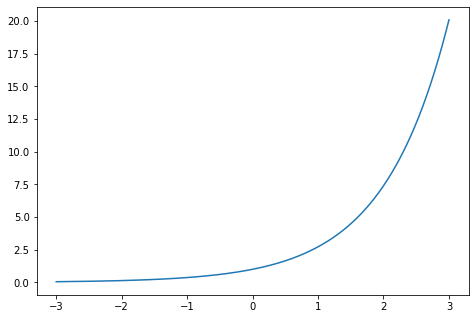

In [36]:
# Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений. 
# Первым аргументом подается последовательность чисел аргумента, 
# вторым — последовательность значений функции для каждого аргумента:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

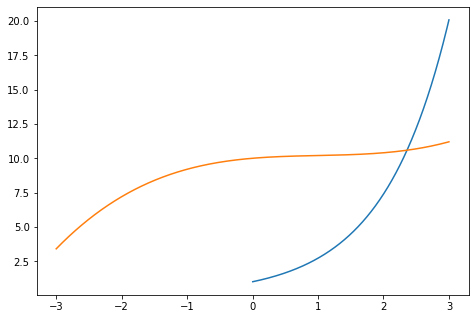

In [37]:
# Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. 
# В таком случае отрисовка будет выполнена в том же matplotlib.pyplot.figure, который в данном случае 
# создается автоматически при первой отрисовке. 
# Для примера добавим к нашему графику какой-нибудь полином третьей степени:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

In [ ]:
# Воспользуемся функцией matplotlib.pyplot.figure для создания фигуры заданного размера. 
# Размер фигуры задается в дюймах. При этом для отображения на реальном дисплее количество пикселей 
# определяется за счет установленного dpi — dots per inch (по умолчанию 100).

# При визуализации большого объема данных часто приходится выделять те или иные графики. 
# Как и при написании текстов, это можно сделать с помощью форматирования. 
# Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. 
# Описание возможных стилей и маркеров можно посмотреть в документации.

# Отрисуем линию в стиле "dashed line":

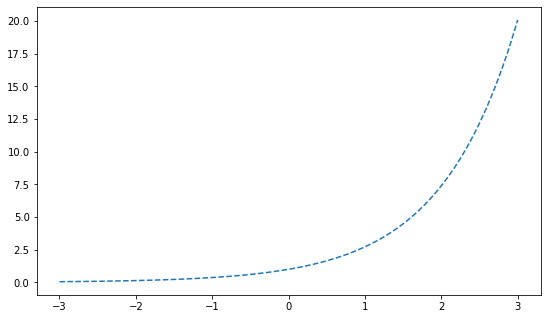

In [40]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

In [ ]:
# Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. 
# Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, 
# тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. 
# Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

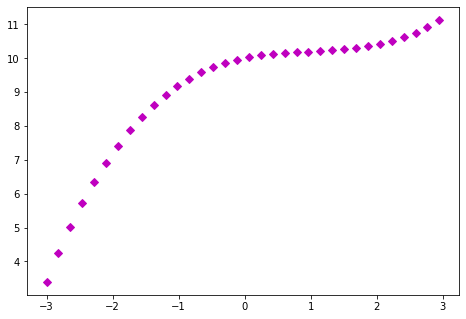

In [23]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

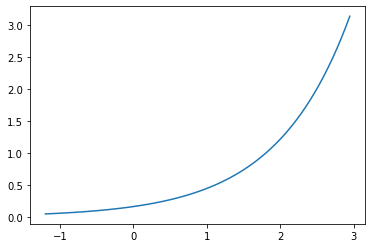

In [28]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)
plt.plot(x[300::10], y1[:700:10])

In [ ]:
# 7.9
# Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать 
# разные типы графиков и использовать расширенные настройки при оформлении. 
# Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности 
# для творчества при визуализации данных.

In [33]:
import warnings; warnings.simplefilter('ignore')


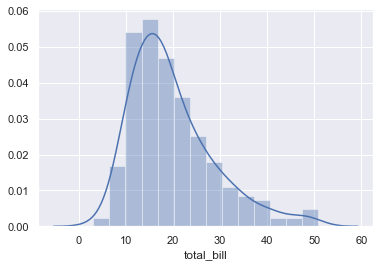

In [34]:
sns.set()
sns.distplot(df['total_bill'])

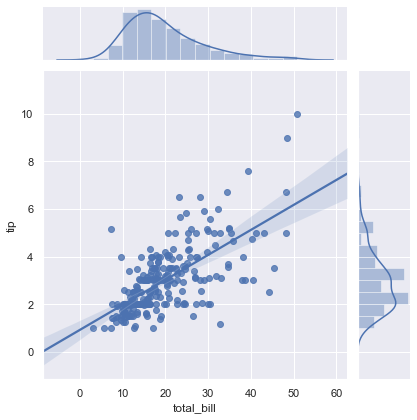

In [39]:
# Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать 
# связь между ними. Тип графика, используемый для этого, называется jointplot:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg') # scatter, reg, resid, kde, hex

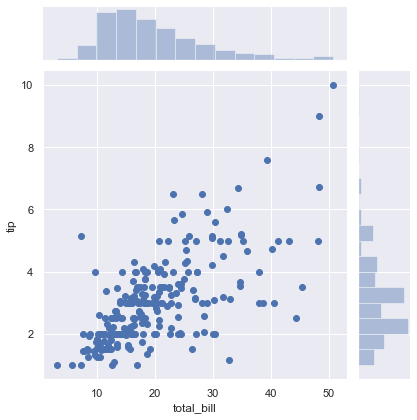

In [40]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'scatter') # scatter, reg, resid, kde, hex

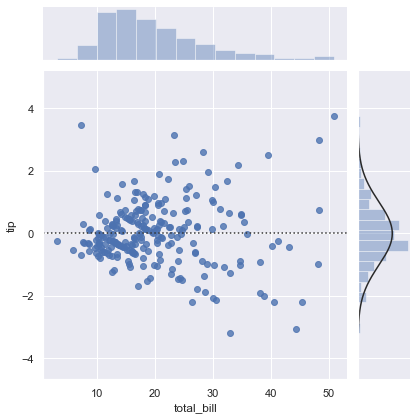

In [41]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'resid') # scatter, reg, resid, kde, hex

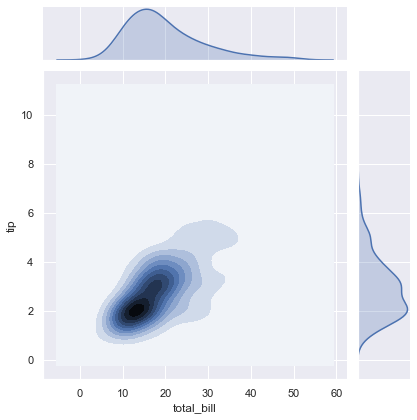

In [42]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'kde') # scatter, reg, resid, kde, hex

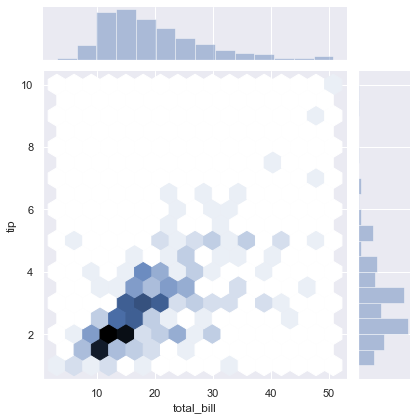

In [44]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'hex') # scatter, reg, resid, kde, hex

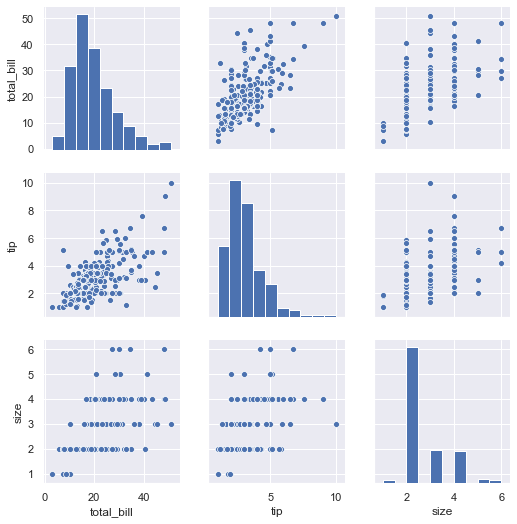

In [38]:
# Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и 
# особенности связей между ними — построить график типа pairplot:
sns.pairplot(df)

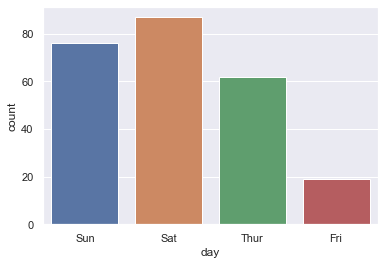

In [45]:
# 7.10
# Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib 
# приходится предварительно обрабатывать датафрейм, группируя нужные данные. 
# В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными 
# признаками напрямую. Для построения гистограммы распределения категориального признака можно 
# воспользоваться методом countplot:
sns.countplot(x = 'day', data = df)

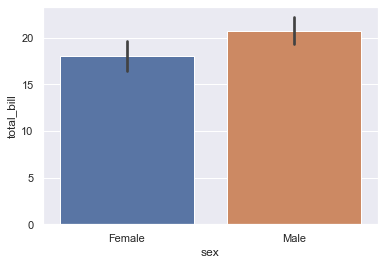

In [46]:
# Категориальные значения при построении графиков можно использовать в качестве одного из параметров 
# метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной 
# переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. 
# Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование 
# которой задается в параметре estimator.
sns.barplot(x = 'sex', y = 'total_bill', data = df)

In [ ]:
# Box plot — тип графика, компонентами которого являются:

# ● Отрезок (Range), отражающий диапазон значений набора данных.
# ● Прямоугольник (Box), который отображает границы основного объема данных. 
    # Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. 
    # Правой границей является 75%-ый квантиль, или Q3, третий квартал.
# ● Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. 
    # Фактически эти значения не всегда являются минимумом или максимумом набора. 
    # Они представляют значения, отстоящие на 1.5*IQR влево 
    # или вправо от левой (Q1) или правой (Q2) границы соответственно. 
    # Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3.
# ● Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

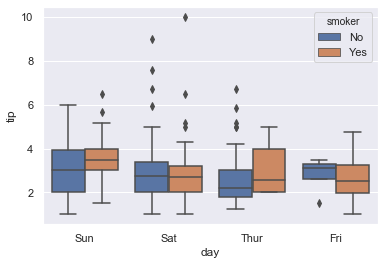

In [48]:
# Для создания графиков такого типа в Seaborn используется метод boxplot. 
# Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются 
# значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в 
# зависимости от дня недели:
sns.boxplot(x = 'day', y = 'tip', data = df, hue='smoker')

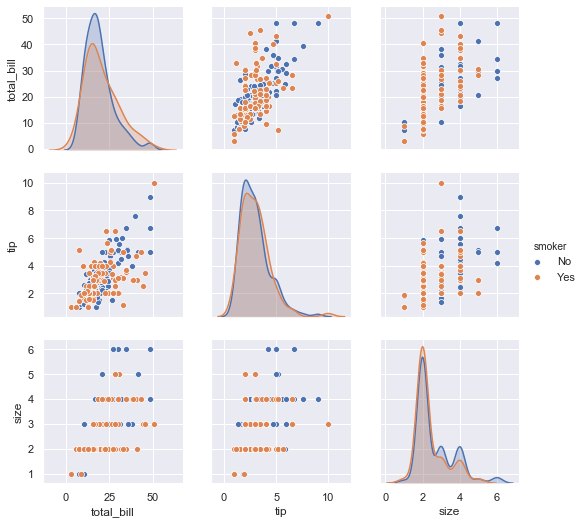

In [49]:
sns.pairplot(df, hue = 'smoker')

In [ ]:
# Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. 
# Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное 
# значение коэффициента к единице, тем сильнее связь между признаками.

# Для отображения информации о результатах корреляционного анализа в Seaborn часто используются 
# тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты 
# корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). 
# Результат вычислений сохраним в новом датафрейме correlation:

In [51]:
correlation = df.corr()

In [ ]:
# Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap.
# Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. 
# Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):

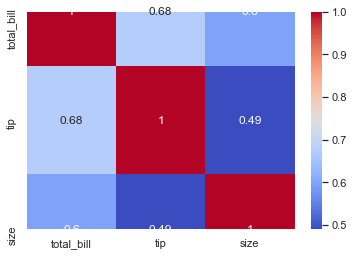

In [52]:
sns.heatmap(correlation, annot= True, cmap = 'coolwarm')

In [ ]:
# 7.12
# Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить. 
# Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую 
# из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды 
# нужно добавить восклицательный знак.

# Введите в свободную ячейку jupyter notebook команду:
# !pip install plotly

# Для эффективного взаимодействия Plotly с датафреймами Pandas нам понадобится библиотека Cufflinks. 
# Установите её командой:
# !pip install cufflinks

In [53]:
!pip install plotly

     |████████████████████████████████| 7.1 MB 2.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=43a68c155e79d478c44402ef7a8ec4645665ee3b02eaa590699fbb1fc50407da
  Stored in directory: /Users/inikki/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [54]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 1.5 MB/s eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=a284423d5cd884912a9a08042c50e7d200a1fe357b0044c56e9b72afdbab3a26
  Stored in directory: /Users/inikki/Library/Caches/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [ ]:
# 7.13

In [1]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [2]:
init_notebook_mode(connected = True)
cf.go_offline()

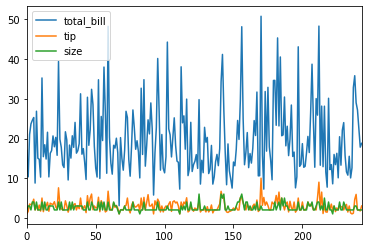

In [6]:
# Для создания разных типов графиков в Pandas используется метод plot с различными настройками:
df.plot()

In [ ]:
# Для превращения графика в интерактивную визуализацию достаточно добавить в код всего одну букву:

In [7]:
df.iplot()

In [ ]:
# Функции графика, созданного методом iplot:

# ● получение в интерактивном режиме значения признака в отдельных точках;
# ● регулирование отображения конкретных признаков (отключение и включение данных признаков без изменения кода);
# ● увеличение фрагмента графика;
# ● сохранение полученного графика в формате png напрямую из jupyter notebook.

# Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять 
# тип и другие особенности диаграммы. Plotly позволяет создавать новые виды графиков. 
# Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и 
# размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами 
# для разных заказов:

In [8]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [ ]:
# Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. 
# Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, 
# отложенных на оси абсцисс и оси ординат:

In [10]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip')

In [ ]:
# see more functionality:
# ● https://plotly.com/python/basic-charts/
# ● https://plotly.com/python/statistical-charts/
# ● https://plotly.com/python/scientific-charts/
# ● https://plotly.com/python/maps/

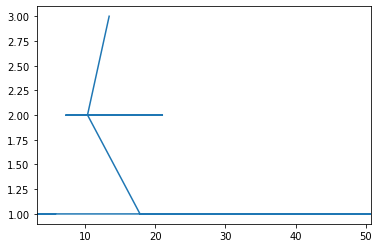

In [11]:
df['total_bill'].value_counts().plot()